In [1]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Function to extract parameters from model name
def extract_parameters(model_name):
    # Regular expression to match hidden_dims and dense_units including brackets
    hidden_dims_pattern = r'hidden_dims_\[(.*?)\]'
    dense_units_pattern = r'dense_units_\[(.*?)\]'
    dropout_pattern = r'dropout_(\d+\.\d+)'
    lr_pattern = r'lr_(\d+\.\d+)'
    batch_pattern = r'batch_(\d+)'
    epochs_pattern = r'epochs_(\d+)'

    # Extract values using regex
    hidden_dims_match = re.search(hidden_dims_pattern, model_name)
    dense_units_match = re.search(dense_units_pattern, model_name)
    dropout_match = re.search(dropout_pattern, model_name)
    lr_match = re.search(lr_pattern, model_name)
    batch_match = re.search(batch_pattern, model_name)
    epochs_match = re.search(epochs_pattern, model_name)

    # Get matched values or None if not found
    hidden_dims = hidden_dims_match.group(1) if hidden_dims_match else None
    dense_units = dense_units_match.group(1) if dense_units_match else None
    dropout = dropout_match.group(1) if dropout_match else None
    lr = lr_match.group(1) if lr_match else None
    batch_size = batch_match.group(1) if batch_match else None
    epochs = epochs_match.group(1) if epochs_match else None

    return pd.Series([hidden_dims, dense_units, dropout, lr, batch_size, epochs])

df = pd.read_excel('results_summary.xlsx')
df[['hidden_dims', 'dense_units', 'dropout', 'lr', 'batch_size', 'epochs']] = df['Model Name'].apply(extract_parameters)



In [3]:
df['Validation RMSE'] = np.sqrt(df['Validation MSE'])
df['Test RMSE'] = np.sqrt(df['Validation MSE'])

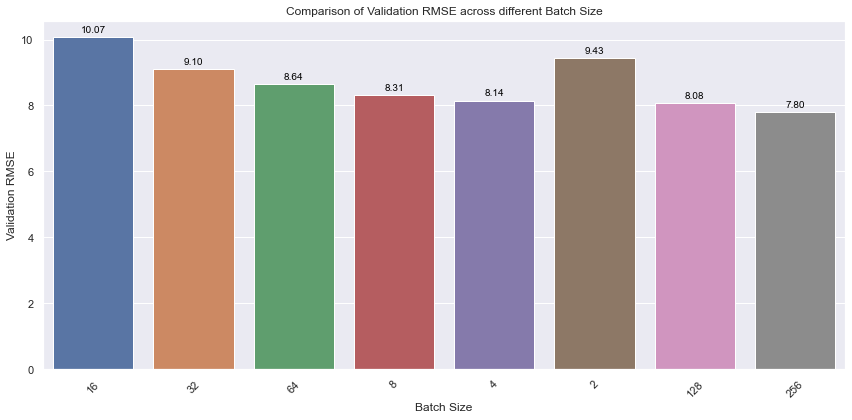

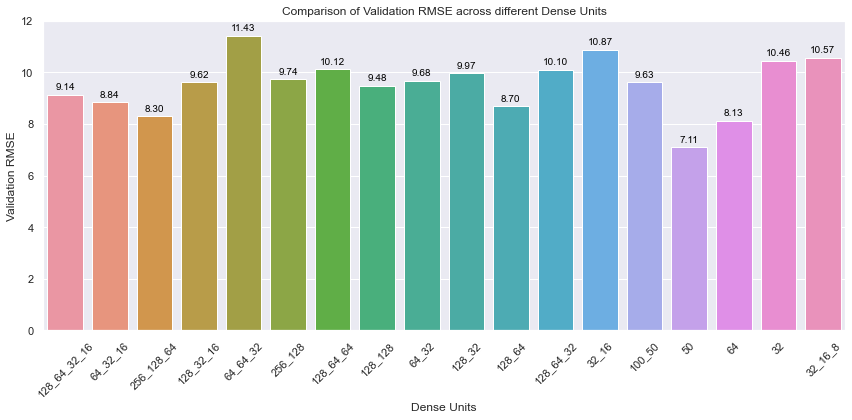

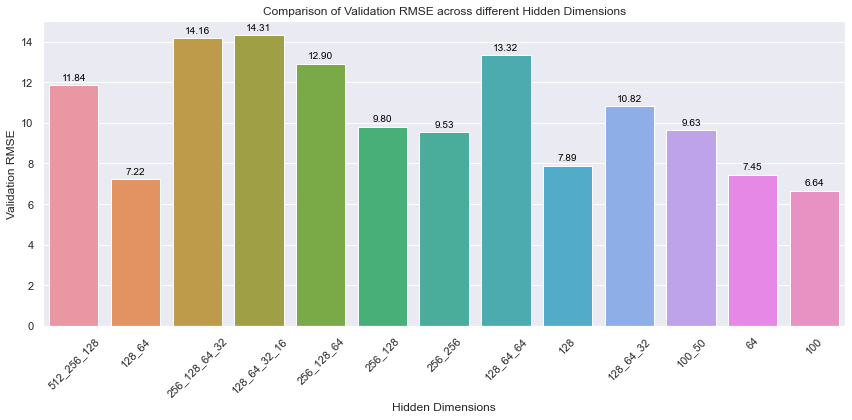

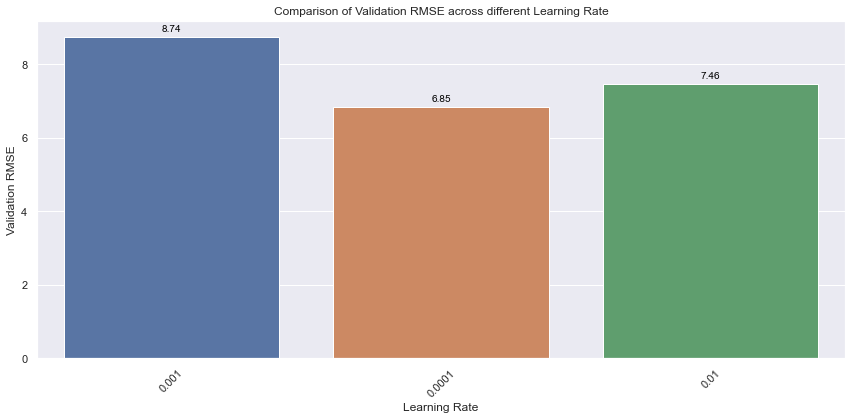

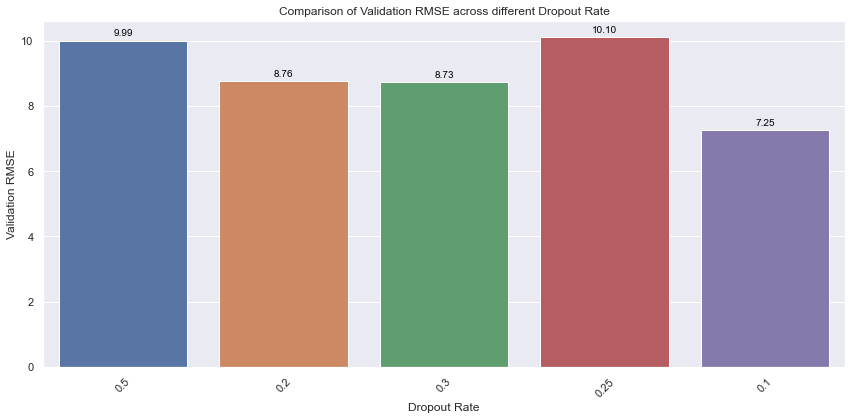

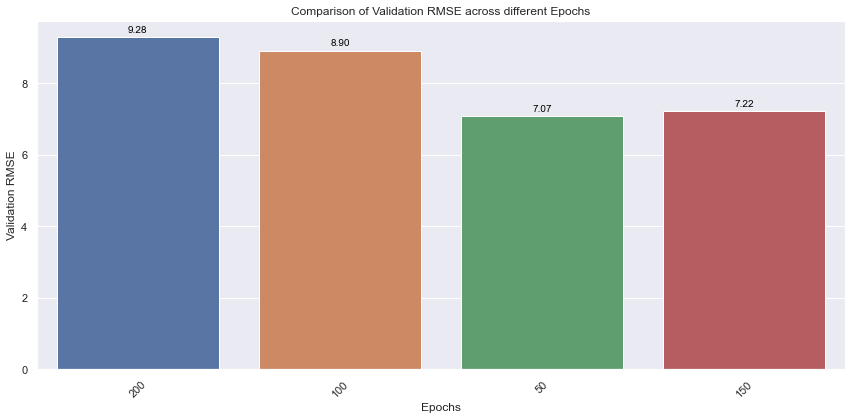

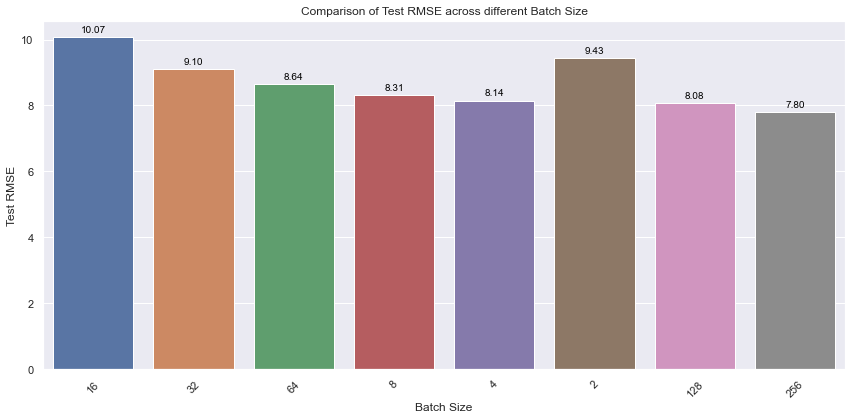

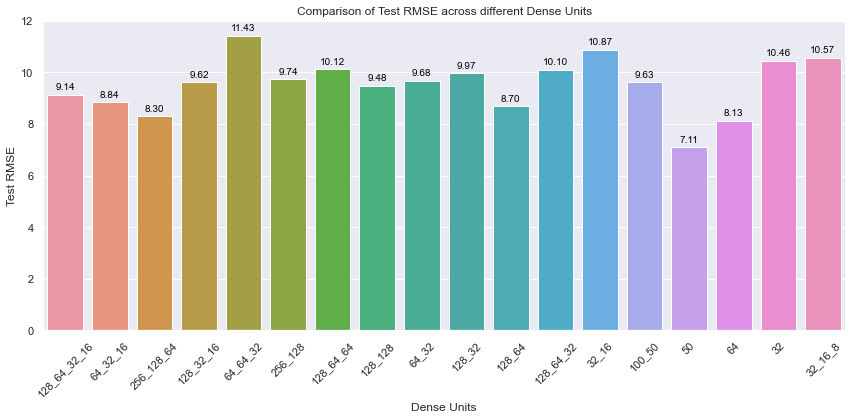

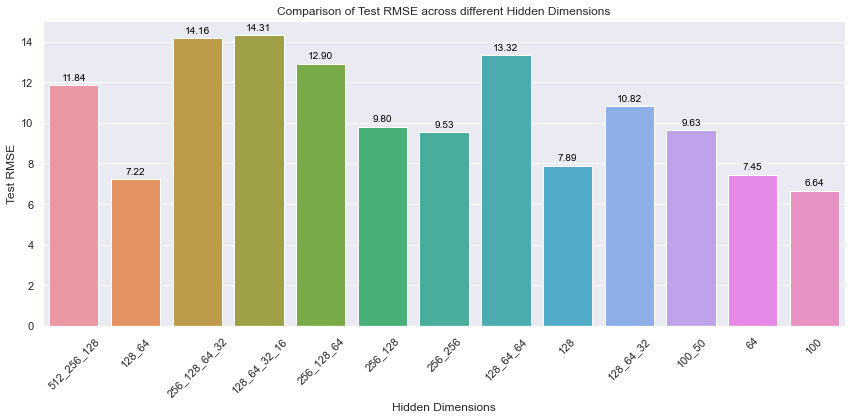

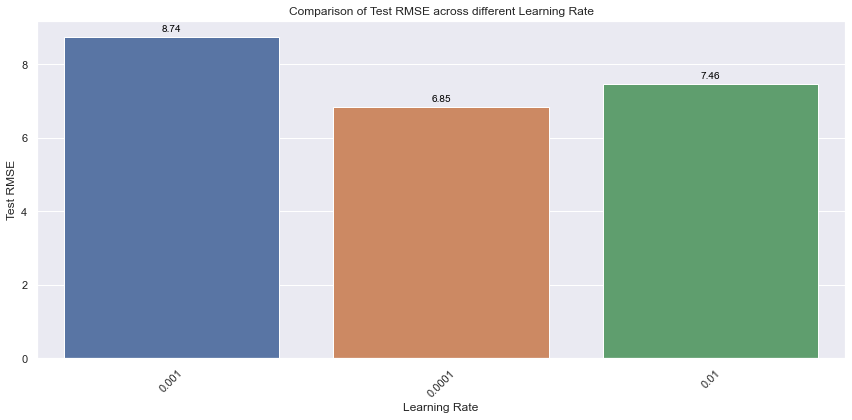

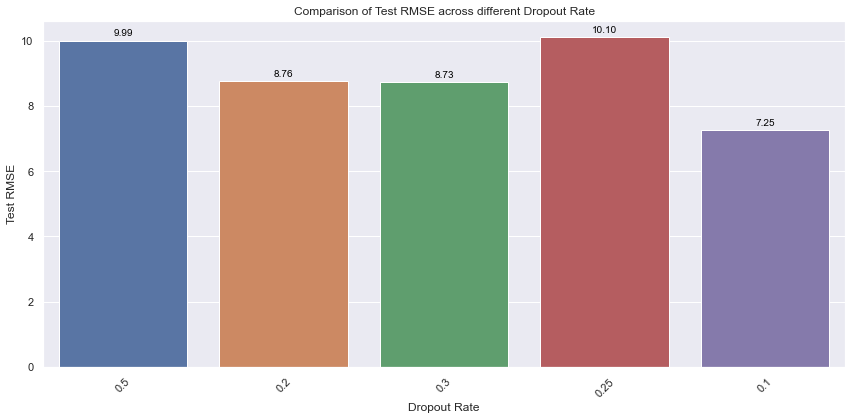

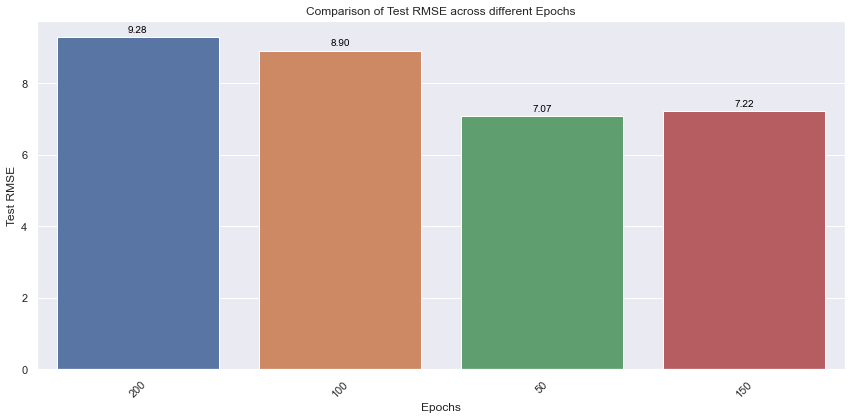

In [4]:
# Function to create plots for a given metric
def plot_mse_comparison(df, metric, param, title_suffix):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x=param, y=metric, ci=None)  # Set ci=None to remove error bars
    
    # Add the value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', 
                    xytext=(0, 5),  # Offset text above the bar
                    textcoords='offset points')
    
    plt.title(f'Comparison of {metric} across different {title_suffix}')
    plt.xlabel(title_suffix)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 1. Validation RMSE comparisons
plot_mse_comparison(df, 'Validation RMSE', 'batch_size', 'Batch Size')
plot_mse_comparison(df, 'Validation RMSE', 'dense_units', 'Dense Units')
plot_mse_comparison(df, 'Validation RMSE', 'hidden_dims', 'Hidden Dimensions')
plot_mse_comparison(df, 'Validation RMSE', 'lr', 'Learning Rate')
plot_mse_comparison(df, 'Validation RMSE', 'dropout', 'Dropout Rate')
plot_mse_comparison(df, 'Validation RMSE', 'epochs', 'Epochs')

# 2. Test RMSE comparisons
plot_mse_comparison(df, 'Test RMSE', 'batch_size', 'Batch Size')
plot_mse_comparison(df, 'Test RMSE', 'dense_units', 'Dense Units')
plot_mse_comparison(df, 'Test RMSE', 'hidden_dims', 'Hidden Dimensions')
plot_mse_comparison(df, 'Test RMSE', 'lr', 'Learning Rate')
plot_mse_comparison(df, 'Test RMSE', 'dropout', 'Dropout Rate')
plot_mse_comparison(df, 'Test RMSE', 'epochs', 'Epochs')




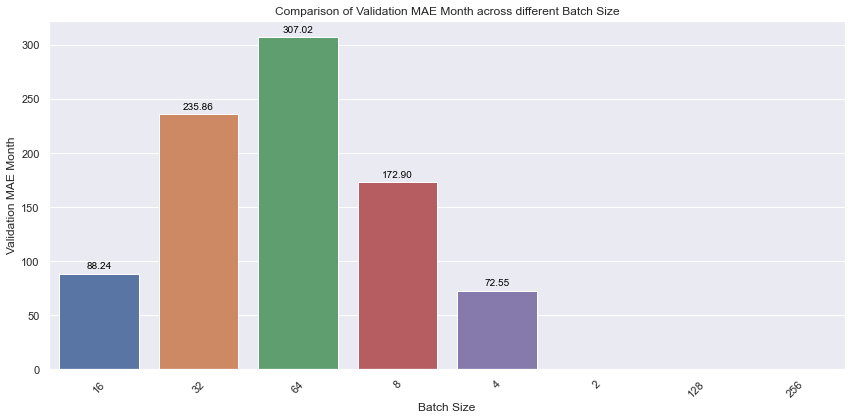

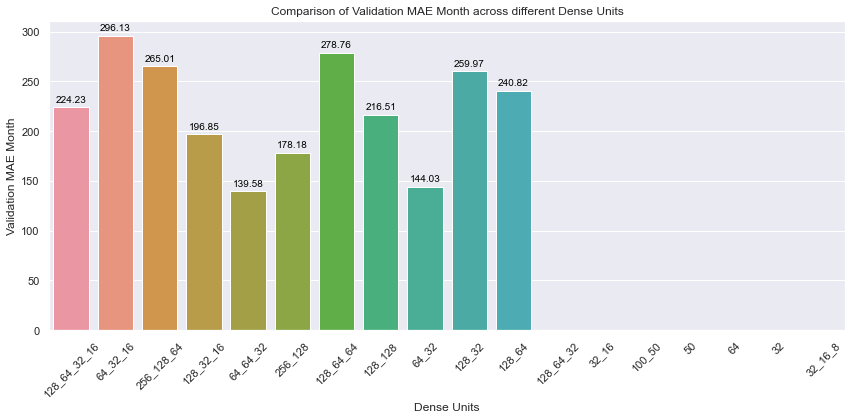

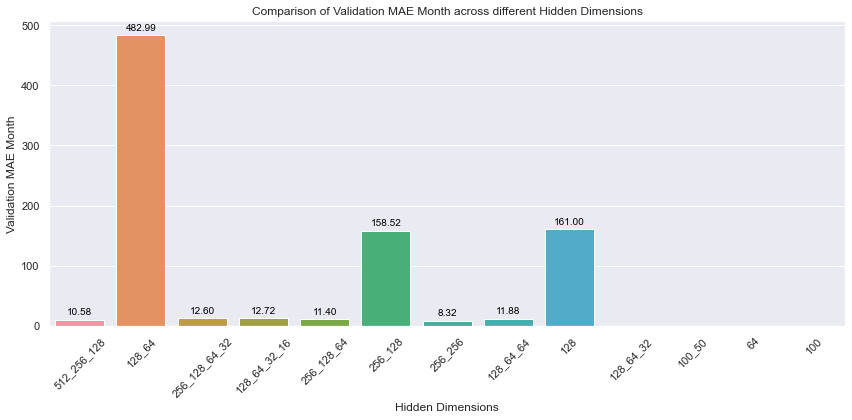

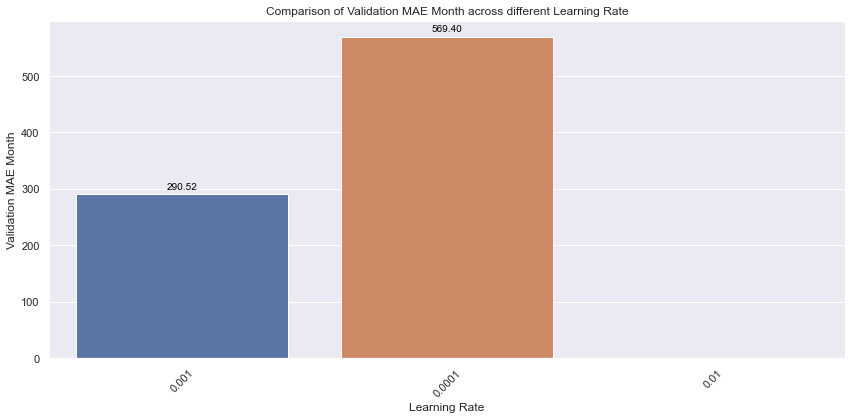

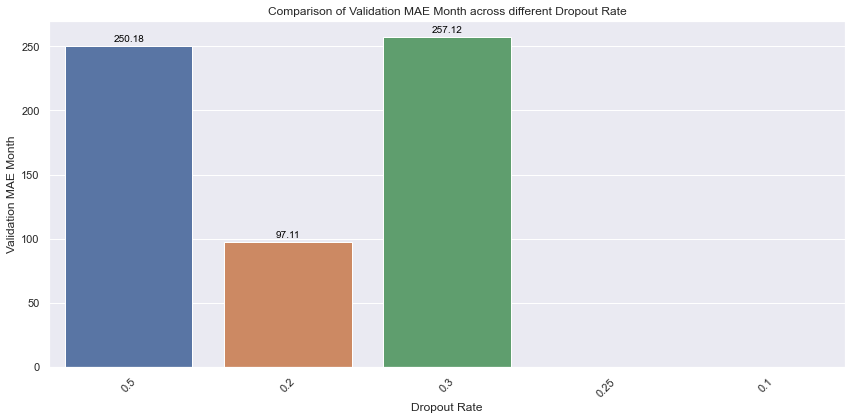

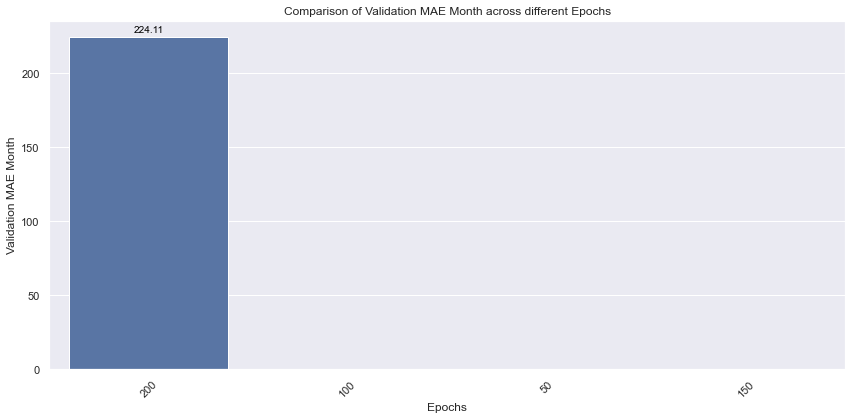

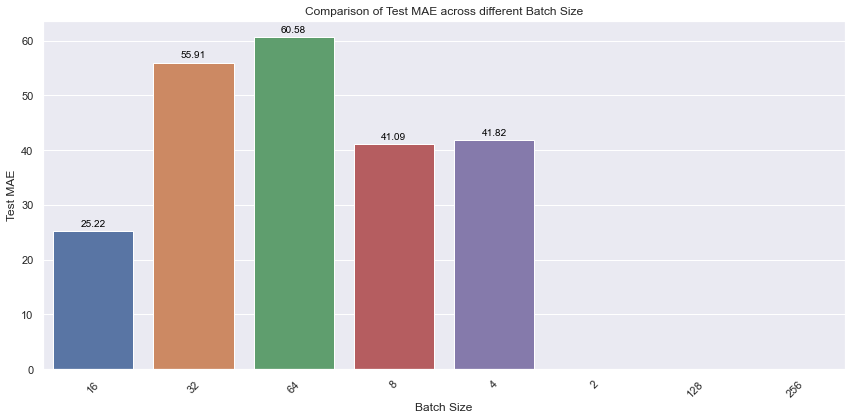

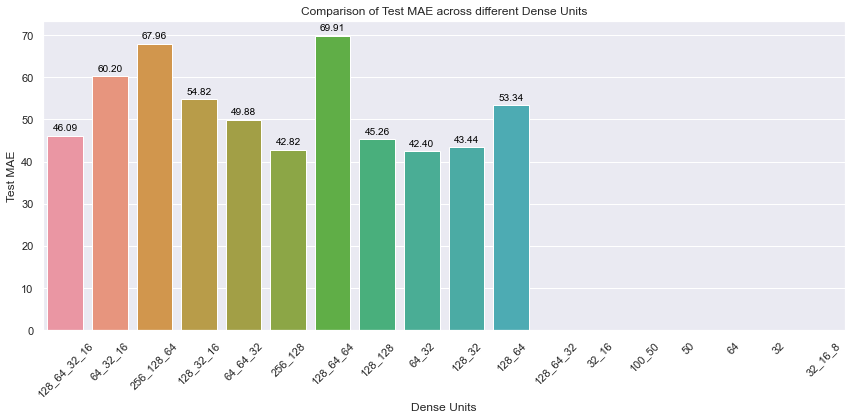

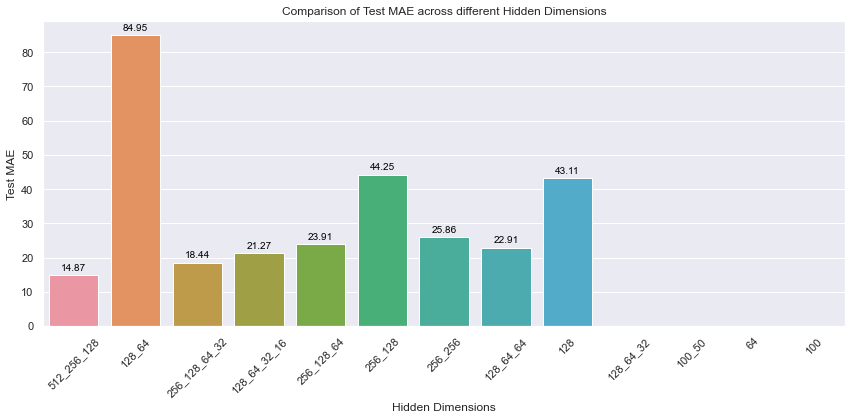

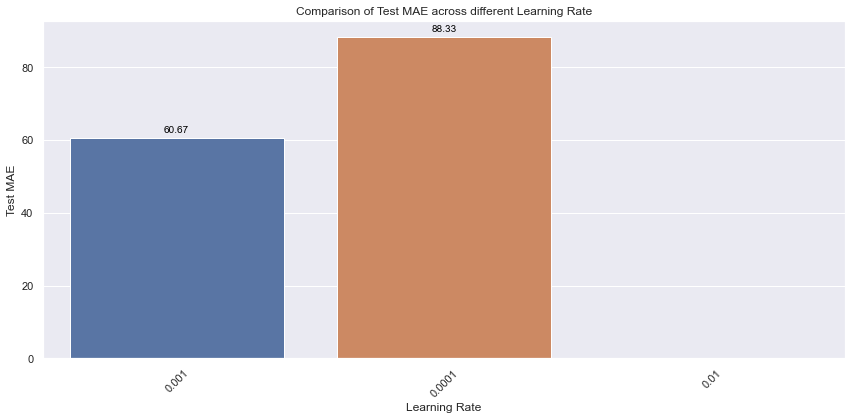

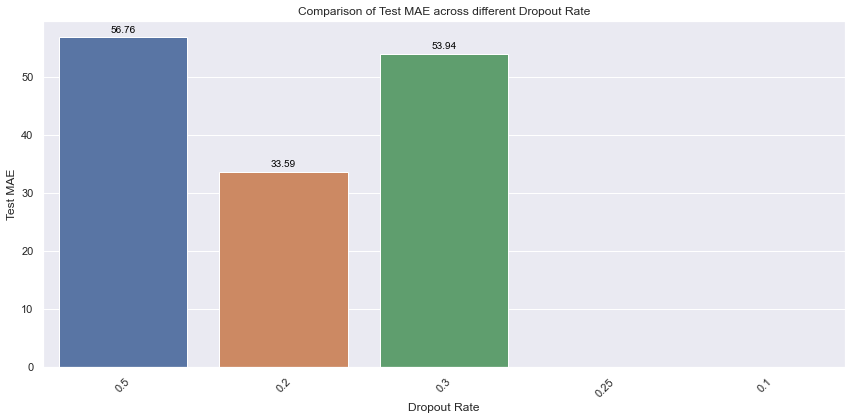

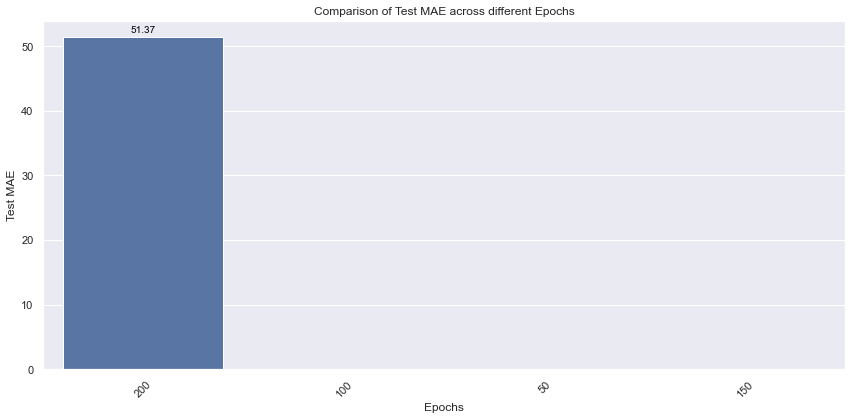

In [5]:
# 1. Validation RMSE comparisons
plot_mse_comparison(df, 'Validation MAE Month', 'batch_size', 'Batch Size')
plot_mse_comparison(df, 'Validation MAE Month', 'dense_units', 'Dense Units')
plot_mse_comparison(df, 'Validation MAE Month', 'hidden_dims', 'Hidden Dimensions')
plot_mse_comparison(df, 'Validation MAE Month', 'lr', 'Learning Rate')
plot_mse_comparison(df, 'Validation MAE Month', 'dropout', 'Dropout Rate')
plot_mse_comparison(df, 'Validation MAE Month', 'epochs', 'Epochs')

# 2. Test RMSE comparisons
plot_mse_comparison(df, 'Test MAE', 'batch_size', 'Batch Size')
plot_mse_comparison(df, 'Test MAE', 'dense_units', 'Dense Units')
plot_mse_comparison(df, 'Test MAE', 'hidden_dims', 'Hidden Dimensions')
plot_mse_comparison(df, 'Test MAE', 'lr', 'Learning Rate')
plot_mse_comparison(df, 'Test MAE', 'dropout', 'Dropout Rate')
plot_mse_comparison(df, 'Test MAE', 'epochs', 'Epochs')
